### Problem Satement 
- From the given 'Iris' dataset predict the optimum number of clusters and represent it visually.

In [1]:
import pandas as pd 

In [2]:
##Loading the dataset
path = "C:\\Users\MyPc\\Downloads\\Iris - Iris.csv"
df= pd.read_csv(path)
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
##Dropping the index column.
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

##### EDA

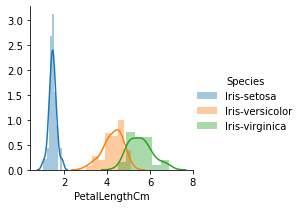

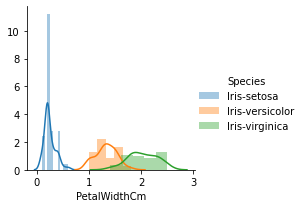

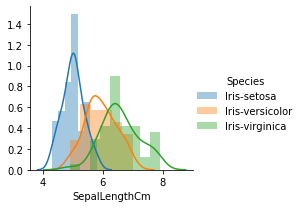

In [5]:
sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

Observations-

- We can see skewness in the coloumns.
- We can see that in case Sepal Length there maximumm over lap(of all the three species) in comparision to Petal Width and Petal Length.
- We cann see that for the species "Iris-versicolor" and "Iris-virginica" there is an overlapping for petal length and petal width. 

In [9]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=df["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [10]:
iris_setosa=df.loc[df["Species"]=="Iris-setosa"]
iris_virginica=df.loc[df["Species"]=="Iris-virginica"]
iris_versicolor=df.loc[df["Species"]=="Iris-versicolor"]


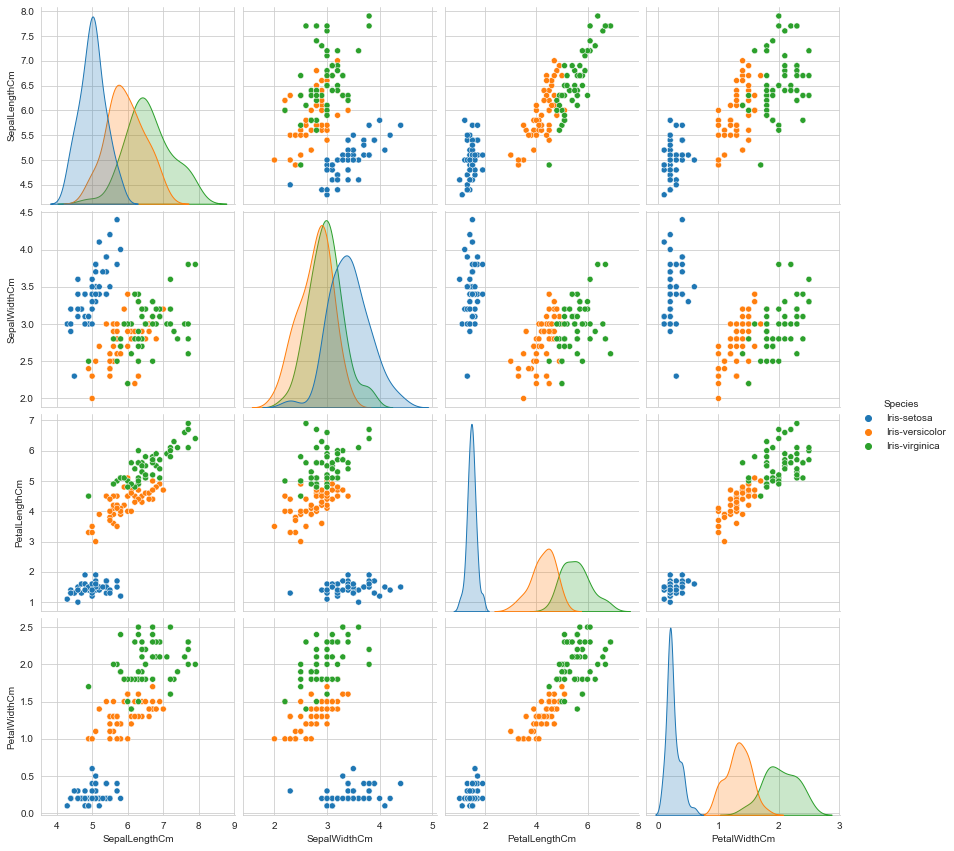

In [6]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species",size=3);
plt.show()

In [7]:
#####will store the values for the within cluters sum of squares, so will be uisng inertial values to calculate compact clusters, so the ideal k value will have the lowest value.
wcss=[]

x =df.iloc[:, [0, 1, 2, 3]].values###Excluding the label column('species')
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=200,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

680.8243999999996
152.36870647733915
78.94084142614601
57.317873214285726
46.56163015873017
38.930963049671746
34.190687924796634
30.063874432733137
27.84235606060608
26.04820224804435


Text(0.5, 1.0, 'The Elbow Method')

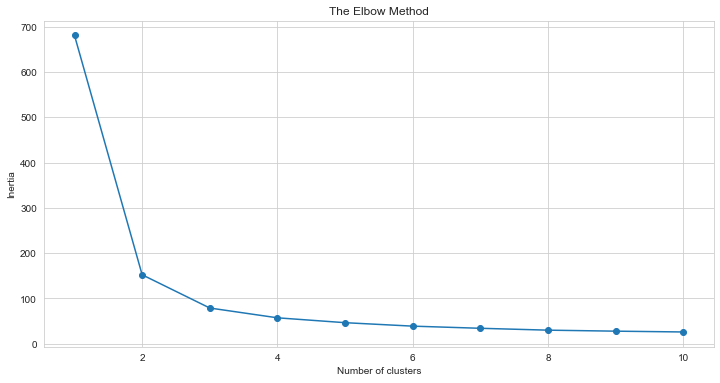

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')

- As it can be seen that from the elbow curve we can choose any number of cluters 3 or 4. but for choosing the idela number of cluters we need to compute the inertial value. We will choose the cluter with the lower inertial value.

In [15]:
###choosing number of cluters to be 3.
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(kmeans.inertia_)

78.94084142614601


In [16]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(kmeans.inertia_)

57.317873214285726


- We can see that if the number of cluters is 4 then the intertial value will be less which means more compact clusters as the distance between the centroid of the cluster to its surrounding data points will be less.

##### Checking for optimum clusters.

In [26]:

###choosing number of cluters to be 3.
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


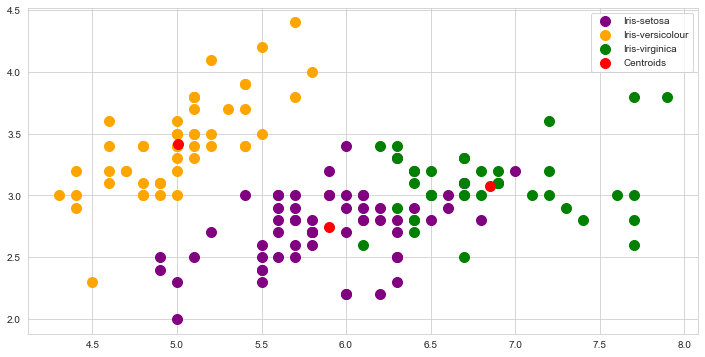

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

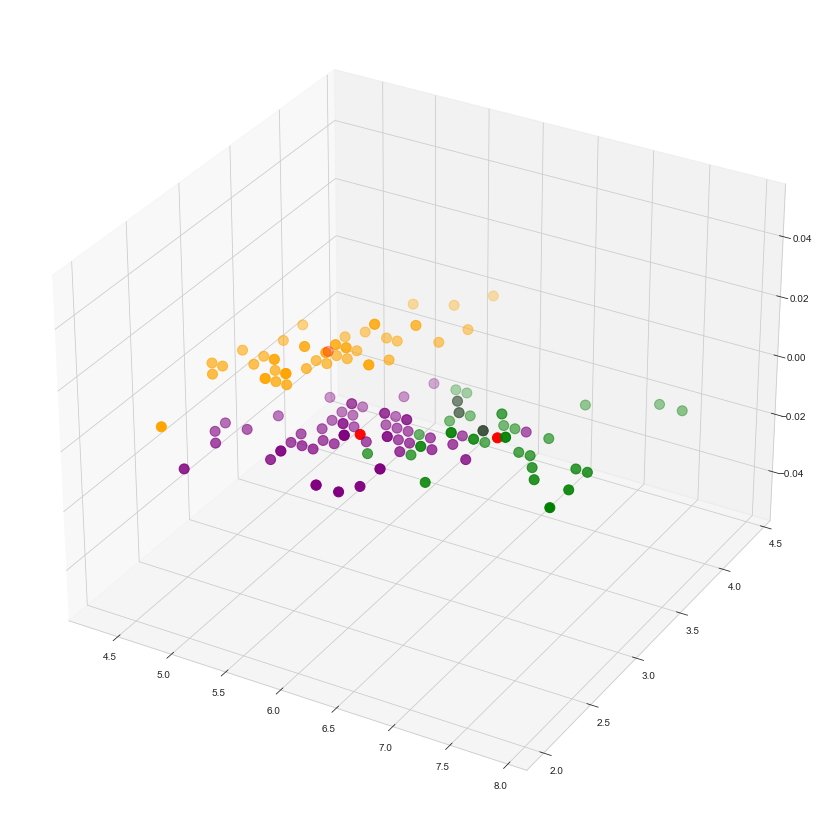

In [20]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [8]:
###choosing number of cluters to be 3.
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


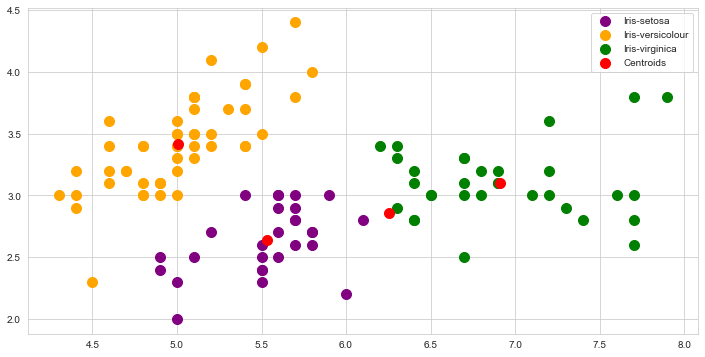

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

- After implementation of both the values of K ( 3and 4) w ecan see that for K= 3 the clusters are spread and clear but for K=4 it can be seen that the clustering changes the data points that were previously as Iris Setosa is now changed to Iris virginica probably as the new centroid is more closer to virginica than setosa so it treats few of the near data points as virginica.

### It will best to select the number of clusters to be 3.